In [1]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns; 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from pylab import savefig

In [21]:
k = 6
img = plt.imread("./{}.png".format(k))
reconstruction = np.load("./{}_reconstruction.npy".format(k))
features = np.load("./{}_features.npy".format(k))

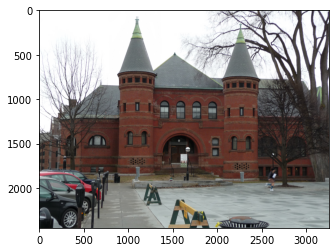

In [22]:
plt.imshow(img)

<AxesSubplot:>

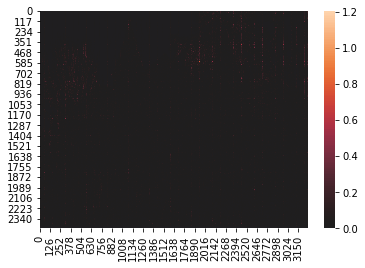

In [23]:
error = np.abs(features-reconstruction)
error = np.sum(error, axis=-1)
mean = np.mean(error)
sns.heatmap(error, center=mean)

## Cluster

In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import skimage.morphology as morph
from scipy.ndimage.measurements import label

In [8]:
error_list = []
n, m = error.shape
for i in range(n):
    for j in range(m):
        error_list.append([error[i, j]])

In [9]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(error_list)

In [10]:
counts = [0, 0, 0, 0, 0]
for e in kmeans.labels_:
    counts[e] += 1

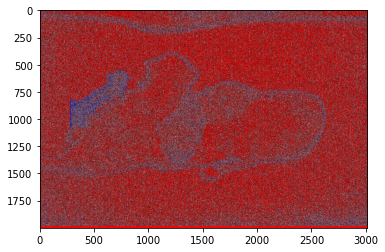

In [11]:
n, m = error.shape
error_2 = np.zeros((n, m, 3))
count = 0
for i in range(n):
    for j in range(m):
        col = kmeans.labels_[count]
        if col == 2:
            error_2[i, j] = [1, 1, 1]
        if col == 3:
            error_2[i, j] = [1, 0, 0]
        if col == 4:
            error_2[i, j] = [0, 0, 1]
        if col == 5:
            error_2[i, j] = [0, 1, 0]
        count += 1
plt.imshow(error_2)

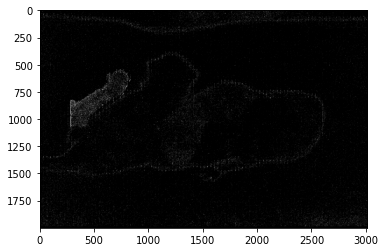

In [12]:
error_2 = np.zeros((n, m))
count = 0
for i in range(n):
    for j in range(m):
        classe = kmeans.labels_[count]
        if classe != np.argmax(counts):
            if classe == 4:
                error_2[i,j] = 1
            
        count += 1
plt.imshow(error_2, "gray")

## Morphologie

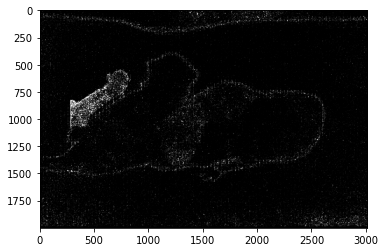

In [13]:
closing = morph.binary_closing(error_2, morph.square(4))
plt.imshow(closing, "gray")

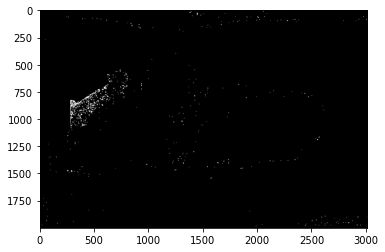

In [14]:
opening = morph.binary_opening(closing, morph.square(4))
plt.imshow(opening, "gray")

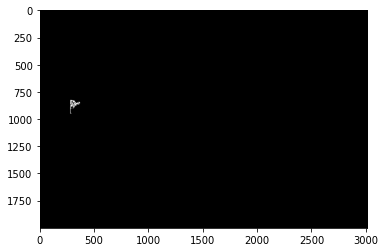

In [15]:
labeled_array, num_features = label(opening)

count = [0 for _ in range(num_features)]
for i in range(n):
    for j in range(m):
        lab = labeled_array[i, j]
        if lab != 0:
            count[lab - 1] += 1

error_final = np.zeros(error.shape)
for i in range(n):
    for j in range(m):
        if labeled_array[i, j] == np.argmax(count) + 1:
            error_final[i, j] = 1
plt.imshow(error_final, "gray")  

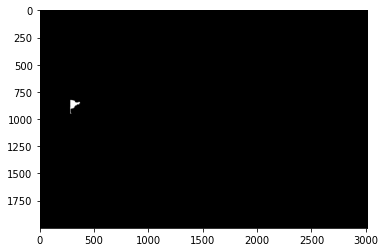

In [16]:
closing_2 = morph.binary_closing(error_final, morph.square(15))
plt.imshow(closing_2, "gray")

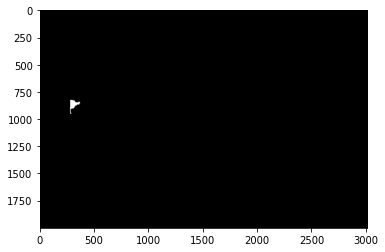

In [17]:
dilatation = morph.binary_dilation(closing_2)
plt.imshow(dilatation, "gray")
